-4.9840830965973995
[[112.42350642]
 [120.82225037]
 [136.895214  ]
 [274.96072965]
 [483.01412297]
 [561.93139224]
 [464.33143065]
 [305.31253688]
 [144.61273506]
 [128.65726771]
 [ 25.2018483 ]
 [ -4.9840831 ]]


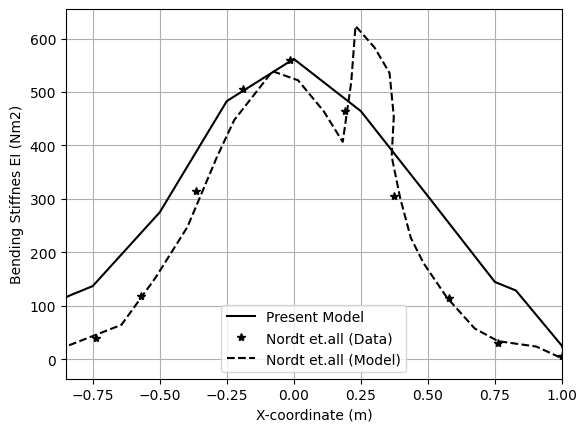

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import csv


##############################
Validationx=np.array([-0.738095043,-0.571428528,-0.36507948,-0.190475974,-0.015873074,0.190475974,0.373015866,0.579364914,0.761904805,1])
Validationy=np.array([40.67824007,118.6440371,315.2543885,505.0849255,559.3221479,464.406944,305.0849255,115.2545178,30.50877703,6.779943749])
ValiNordtx=([-0.992063615,-0.833333485,-0.642857208,-0.515873225,-0.396825627,-0.285714415,-0.222222121,-0.079365368,
             0.015873074,0.111110909,0.182539589,0.214285736,0.230158507,0.301587186,0.35714249,0.373015866,
             0.36507948,0.396825022,0.436507554,0.484127078,0.571428528,0.674602749,0.761904805,0.904761559,1.007936385])
ValiNordty=([-3.389519284,27.11886982,64.40707335,152.5423334,247.4577959,379.6612032,447.4577959,538.9832218,522.0340736,
              464.406944,406.7798144,518.6441664,623.7289626,583.0509812,535.5933146,454.237481,379.6612032,
             301.6951476,227.1188698,179.6612032,115.2545178,57.62738823,33.89829632,23.72909191,0])
#############################33




# Global parameters
length    = 1.886         # Length of the Board in meters
Lr        = 1.645
YACP      =-0.8285
YFCP      = 0.8285
Ytail     =-0.867
Ytip      = 1.019
#width     = 8.89e-4          # Width of the Board in meters
thickness = 2e-3             # Thickness of the Board in meters


#num_elements= int(input("Enter the number of mesh elements: "))

# Array for the SKi K2 ChK 204 Dimenssions
YL=np.array([Ytail,YACP,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,YFCP,1,Ytip])     # kyepoints along the length
tL=1e-3*np.array([66,67,73,113,158,172,151,114,71,65,65,65])               # Total Thickness along X direction
b=1e-4*np.array([832,867,834,721,659,649,690,782,925,974,220,0])             # kyepoints along the width
kL=1e-3*np.array([6,0,.6,2.9,4.2,4.70,4.2,2.90,.6,0,24.5,30.1])              # kyepoints along the z direction

num_elements = len(YL)     # Number of elements

HPly=1e-4*np.array([0.205,0.205,0.255,5.550,5.550,0.255,0.205,0.205])   # Thickness of composite layers 
TotalThickness=np.sum(HPly)

# Material properties
#ABS
E_abs=0.055e6
G_abs=0.02e6
nu_abs=0.4
h_abs=8.89e-4
h_left=3.89e-2
#steel
h_steel=.305e-2
E_steel=200e9          # Young's modulus in Pa of steel
G_steel=80e6          # Shear modulus in Pa
nu_steel=0.3
# CFRP
E_Grfp = 30.510e9         # Young's modulus in Pa
E2_Grfp = 7.845e9        # Young's modulus in Pa (perpendicular to fibers)
nu_Grfp = 0.283         # Poisson's ratio
G_Grfp = 3.220e9         # Shear modulus in Pa
t_Gfrp = thickness     # Thickness of each layer in meters
h_Grfp = 8.64e-4
# Wood
E_wood = 13e9            # Young's modulus in Pa for wood
G_wood = .810e9 
nu_wood = 0.3           # Poisson's ratio for wood
h_wood = thickness      # Thickness of wood layer in meters

b2=8.89e-4
b4=3.06e-3
b1=b-2*b4
h1=TotalThickness
h2=TotalThickness-2.03e-3
h4=2.03e-3
r1=tL/2                 # The distance btw the global centroid and the portion center
r4=h4/2
r2=r4+h2/2
# PolplaWood
E_Pwood = 14e9        # Young's modulus in Pa for Binder
nu_Pwood= 0.3          # Poisson's ratio for Binder
G_Pwood = 5.5e9 
h_Pwood = 16e-3        # Thickness of wood layer in meters

E_Materail=np.array([E_Grfp,E_Grfp,E_Grfp,E_Pwood,E_wood,E_Grfp,E_Grfp,E_Grfp])
G_Materail=np.array([G_Grfp,G_Grfp,G_Grfp,G_Pwood,G_wood,G_Grfp,G_Grfp,G_Grfp])
nu_Materail=np.array([nu_Grfp,nu_Grfp,nu_Grfp,nu_Pwood,nu_wood,nu_Grfp,nu_Grfp,nu_Grfp])



el = float(length /num_elements)
P=1



r1=tL/2              # The distance btw the global centroid and the portion center
r4=h4/2
r2=r4+h2/2

k=30               # The curvatuve of the neutral longitudinal (d2w/dx2)
    
angles=np.array([0,0,0,0,0,0,0])  # Angle of each CFRP layer in degrees

def calculate_ABD_matrices(E_mat, nu_mat,G_mat, h_mat,angles):
    
    # Initialize matrices A, B, and D
    A = np.zeros((3, 3))
    B = np.zeros((3, 3))
    D = np.zeros((3, 3))
    
   
        
      
    # Calculate A matrix elements for wood
    
    for i in np.arange(len(h_mat)-1):    

        if i==3 or i==4:
            Q_mat = np.array([[E_mat[i]/(1 - nu_mat[i]**2), nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [0, 0, G_mat[i]]]) 
            
        else:
            Q_mat = np.array([[E_mat[i]/(1 - nu_mat[i]**2), nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [0, 0, G_mat[i]]]) 
            angle = np.radians(angles[i])
            cos = np.cos(angle)
            sin = np.sin(angle)
            cs = cos*sin
            cc = cos**2
            ss = sin**2
            T = np.zeros((3, 3))
            T = np.array([[cc,    ss,   cs   ],
                     [ss,    cc,  -cs   ],
                     [-2*cs, 2*cs, cc-ss]])
            Q_mat = np.matmul(np.matmul(np.transpose(T), Q_mat), T)
            
        
        A[0, 0] += (Q_mat[0, 0]* (h_mat[i+1]-h_mat[i])) 
        A[1, 1] += (Q_mat[1, 1]* (h_mat[i+1]-h_mat[i])) 
        A[0, 1] += (Q_mat[0, 1]* (h_mat[i+1]-h_mat[i])) 
        A[1, 0] += (Q_mat[1, 0]* (h_mat[i+1]-h_mat[i]))
        A[2, 2] += (Q_mat[2, 2]* (h_mat[i+1]-h_mat[i])) 
    
    # Calculate D matrix elements for wood
        D[0, 0] += Q_mat[0, 0]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[1, 1] += Q_mat[1, 1]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[0, 1] += Q_mat[0, 1]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[1, 0] += Q_mat[1, 0]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[2, 2] += Q_mat[2, 2]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
    
    # Calculate B matrix elements (assuming symmetric laminate)
        B[0, 0] += 0.5*(Q_mat[0, 0]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[1, 1] += 0.5*(Q_mat[1, 1]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[0, 1] += 0.5*(Q_mat[0, 1]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[1, 0] += 0.5*(Q_mat[1, 0]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[2, 2] += 0.5*(Q_mat[2, 2]* (h_mat[i+1]**2-h_mat[i]**2))
        #i+=1
        
        
 
    # Calculate the compliance matrix
    A_B = np.block([[A, B], [B, D]])
    inverse_Stifness_matrix = np.linalg.inv(A_B)
    
    return A, B, D, inverse_Stifness_matrix


# Function to calculate the bending stiffness of a composite laminate
def calculate_bending_stiffness(inSM1,E_steel,E_abs, b1,b2,b4, r1,r2,r4,t4,t2):
    
    beta1=inSM1[0:3,3:6]
    delta1=inSM1[3:6,3:6]
    alfa1=inSM1[0:3,0:3]
   
    #beta2=inSM2[0:3,3:6]
    #alfa2=inSM2[0:3,0:3]
    #delta2=inSM2[3:6,3:6]
    

    EI1=b1*(2*beta1[2,2]*r1-delta1[2,2]*r1**2-alfa1[2,2])/(beta1[2,2]**2-delta1[2,2]*alfa1[2,2])
    #EI2=(2/alfa2[2,2])*(b2**3/12+(r2**2*b2))
    EI2=2*E_abs*b2*t2*(t2**2/12+r2**2)
    EI3=2*E_steel*b4*t4*(t4**2/12+r4**2)

    #Centroide of the section
    G1=(b1*beta1[2,2]-r1*delta1[2,2]*alfa1[2,2])/(beta1[2,2]**2-delta1[2,2]*alfa1[2,2])
    #G4=(r2*b2/alfa2[2,2])
    G4=(r4*b4*E_abs*t4)
    G2=(r4*b4*E_steel*t4)

    G3=-(b1*beta1[2,2]-b1*alfa1[2,2])/(beta1[2,2]**2-delta1[2,2]*alfa1[2,2])
    #G5=(b2/alfa2[2,2])
    G5=(r2*b2*E_abs*t2)
    G6=(r4*b4*E_steel*t4)

    RC=(G1+2*G2+2*G4)/(G3+2*G5+2*G6)
    EI= EI1+EI2+EI3

    return EI


element_length = np.ones(num_elements) * (length / num_elements)


BendingStiff = np.zeros((len(b), 1))
j=0
for itr in b:
    
        
    A1, B1, D1, inverseM1 = calculate_ABD_matrices(E_Materail, nu_Materail,G_Materail, HPly,angles)
        
    EI = calculate_bending_stiffness(inverseM1,E_steel,E_abs, b1[j],b2,b4, r1[j],r2,r4,h4,h2) 
    BendingStiff[j]= EI 
    j=j+1
    #print(j)
    

print(EI)
print(BendingStiff)
plt.figure(2)
plt.plot(YL,BendingStiff,'k-',label='Present Model')
plt.plot(Validationx,Validationy,'k*',label='Nordt et.all (Data)')
plt.plot(ValiNordtx,ValiNordty,'k--',label='Nordt et.all (Model)')
plt.xlim(-0.850,1.0)
plt.legend()
plt.xlabel('X-coordinate (m)')
plt.ylabel('Bending Stiffnes EI (Nm2)')
plt.grid()




-14.814090909090911
0.0
40
40
20


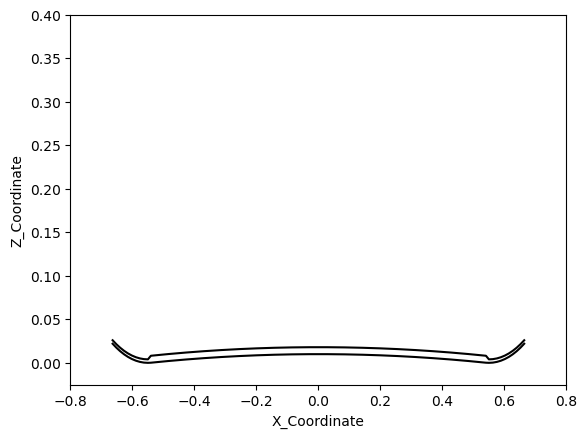

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Lc = 1100e-3   # Contact Length
Ls = 175e-3     # Shovel length
Lh = 175e-3     # Heel Length
Hs = 55e-3      # Tip Height
Hf = 10e-3      # Free Bottom Camber
Hh = 55e-3      # Heel Height
# Global parameters
length    = Lc+Ls+Lh         # Length of the Board in meters
Lr        = 1.645e-3 
YACP      =-0.8285e-3 
YFCP      = 0.8285e-3 
Ytail     =-0.867e-3 
Ytip      = 1.019e-3 
width     = 8.89e-4          # Width of the Board in meters
thickness = 2e-3             # Thickness of the Board in meters

def heel_curve(Lh, Hh):
    rh = (Lh**2 + Hh**2) / (2 * Hh)   
    alfah = np.linspace(np.pi + (np.cos(Lh / rh))**-1, 3 * np.pi / 2, 10)
    Xh = -Lc / 2 + rh * np.cos(alfah)      
    Zh = rh + rh * np.sin(alfah)
    return Xh, Zh

def shovel_curve(Ls, Hs):
    rs = (Ls**2 + Hs**2) / (2 * Hs)   
    alfas = np.linspace(3 * np.pi / 2, 2 * np.pi - (np.cos(Ls / rs))**-1, 10)
    Xs = Lc / 2 + rs * np.cos(alfas)       
    Zs = rs + rs * np.sin(alfas)
    return Xs, Zs

def camber_curve(Lc, Hf, rh, rf,Xh,Xs):
    
    Xf0= ((Lc**2-2*rs*Hf+2*rh*Hf)/(2*Lc))-Lc/2
    rf=((Xf0+Lc/2)**2-2*rh*Hf+Hf**2)/(2*Hf)
    Zf0=Hf-rf
    Xhc=Xh[-1]
    Xsc=Xs[0]
    gammah=(np.sin(1-Hf/rf))**-1
    gammas=(np.sin(1-Hf/rf))**-1
    gamma = np.linspace(gammas,-gammah+np.pi, 200)
    Xf=Xf0+rf*np.cos(gamma)   
    Zf=Zf0+rf*np.sin(gamma)
    print(Zf0)
    print(Xf0)

    return Xf, Zf, Xf0, Zf0


# Heel Curve
Xh, Zh = heel_curve(Lh, Hh)
#plt.plot(Xh, Zh,'*', label='Heel Curve')

# Shovel Curve
Xs, Zs = shovel_curve(Ls, Hs)
#plt.plot(Xs, Zs,'*', label='Shovel Curve')

# Camber Curve
rh = (Lh**2 + Hh**2) / (2 * Hh)
rs = (Ls**2 + Hs**2) / (2 * Hs)
Xf, Zf ,Xf0, Zf0 = camber_curve(Lc, Hf, rh, rs,Xh,Xs)
Xf_filtered = Xf[Zf >= 0]
Zf_filtered = Zf[Zf >= 0]
#plt.plot(Xf_filtered, Zf_filtered,  label='Camber Curve')

Xf_filtered= Xf_filtered[::-1]
Zf_filtered = Zf_filtered[::-1]
#plt.xlabel('X Coordinate')
#plt.ylabel('Z Coordinate')
#plt.title('Shovel Design')
#plt.xlim(-1500,1500)
#plt.ylim(-500,500)
#plt.grid()
#plt.legend()



#####
### This Part is just for visualisation  purposes
def plot_diagram(Lc, rh, rs, Xf0, Zf0):
    alfaformh = np.linspace(1.3*np.pi, 2*np.pi-(np.cos(Ls/rs))**-1, 10)
    alfaforms = np.linspace(2*np.pi-(np.cos(Lh/rh))**-1, 1.3*np.pi, 10)
    Xhform = -Lc/2 + rh * np.cos(alfaformh)      
    Zhform = rh + rh * np.sin(alfaformh)
    Xsform = Lc/2 + rs * np.cos(alfaforms)       
    Zsform = rs + rs * np.sin(alfaforms)
    
    plt.plot(Xhform, Zhform, color='k', linestyle='--', linewidth='0.8')
    plt.plot(Xsform, Zsform, color='k', linestyle='--', linewidth='0.8')
    plt.plot(np.linspace(-1500, 2000, 10), 0 * np.linspace(-1500, 2000, 10), color='k', linestyle='--', linewidth='0.8')
    plt.plot(Lc/2, rs, 'k*')
    plt.plot(-Lc/2, rh, 'k*')
    # plt.plot(Xf0,Zf0,'k*')
    plt.plot([Lc/2, Xf0], [rs, Zf0], color='k', linestyle='--', linewidth='0.8')
    plt.plot([-Lc/2, Xf0], [rh, Zf0], color='k', linestyle='--', linewidth='0.8')
    plt.show()

PtXcoo = np.concatenate((Xh, Xf_filtered, Xs))
PtZcoo = np.concatenate((Zh, Zf_filtered, Zs))
th=4e-3
ts=4e-3
tbody=8e-3
PtXcoou = np.concatenate((Xh, Xf_filtered, Xs))
PtZcoou = np.concatenate((Zh+th, Zf_filtered+tbody, Zs+ts))
print(len(PtXcoo))
print(len(PtZcoo))
#plot_diagram(Lc, rh, rs, Xf0, Zf0)
plt.plot(PtXcoo,PtZcoo,  'k')
plt.plot(PtXcoou,PtZcoou,'k')
plt.xlabel('X_Coordinate')
plt.ylabel('Z_Coordinate')
plt.ylim(-25e-3,400e-3)
plt.xlim(-0.80,.80)
#plt.grid()
print(len(Xf_filtered))
np.savetxt('testX.txt', PtXcoo, delimiter=',', fmt='%1.4e')
np.savetxt('testZ.txt', PtZcoo, delimiter=',', fmt='%1.4e')
np.savetxt('testXu.txt', PtXcoou, delimiter=',', fmt='%1.4e')
np.savetxt('testZu.txt', PtZcoou, delimiter=',', fmt='%1.4e')

0


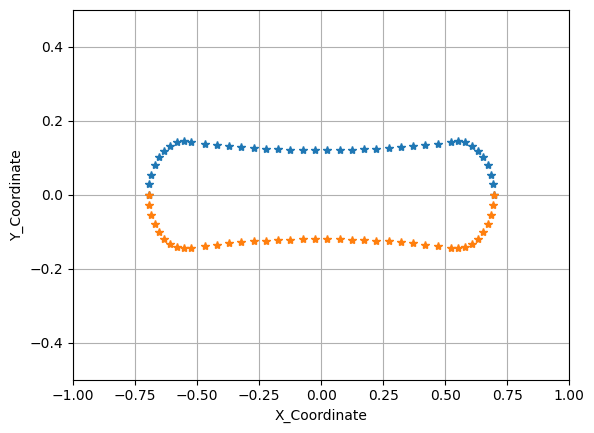

40


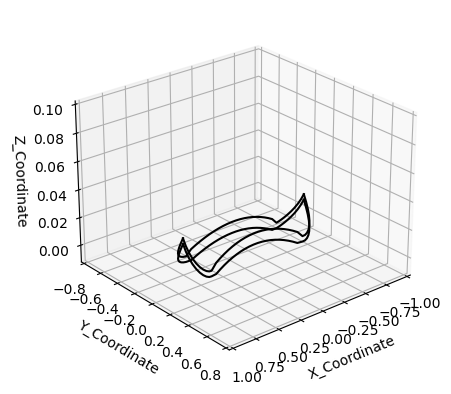

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_coordinates(bm, Lc, Wh, Ws, Xf_filtered):
    Whs = Ws
    
    Rscu = ((Lc)**2 + bm**2 - Whs**2) / (4 * (Whs - bm))
    Xscu = 0
    Yscu = Rscu + bm / 2
    betahu = np.sin(Rscu / (Rscu + Wh / 2))**-1
    betasu = np.sin(Rscu / (Rscu + Ws / 2))**-1
    betau = np.linspace(np.pi + 10.5 * betasu / 8.5, 2 * np.pi - 10.5 * betasu / 8.5, int(len(Xf_filtered)))
    #betau = np.linspace(np.pi +  betasu , 2 * np.pi - betasu , int(len(Xf_filtered)))
    Xscu = Xscu + Rscu * np.cos(betau)
    Yscu = Yscu + Rscu * np.sin(betau)

    Rsc = ((Lc)**2 + bm**2 - Whs**2) / (4 * (Whs - bm))
    Xsc = 0
    Ysc = Rsc + bm / 2
    betah = np.sin(Rsc / (Rsc + Wh / 2))**-1
    betas = np.sin(Rsc / (Rsc + Ws / 2))**-1
    beta = np.linspace(2 * np.pi - betas, np.pi + betah, int(len(Xf_filtered)))
    Xsc = -Xsc - Rsc * np.cos(beta)
    Ysc = -Ysc - Rsc * np.sin(beta)

    betaheel = np.linspace(betah, np.pi, 11)
    Xht = -Lc / 2 + Wh / 2 * np.cos(betaheel)
    Yht = Wh / 2 * np.sin(betaheel)
    Xht=np.delete(Xht,0)
    Yht=np.delete(Yht,0)
    betash = np.linspace(betas, np.pi, 11)
    Xst = Lc / 2 - Ws / 2 * np.cos(betash)
    Yst = Ws / 2 * np.sin(betash)
    Xst=np.delete(Xst,0)
    Yst=np.delete(Yst,0)
    Xht = Xht[::-1]
    Yht = Yht[::-1]

    PtXcoob = np.concatenate((Xht, Xscu, Xst))
    PtYcoob = np.concatenate((Yht, Yscu, Yst))

    return PtXcoob, PtYcoob

def visualisation(bm, Lc, Wh, Ws, Xf_filtered):
    #plt.figure(figsize=(8, 6))

    x_values = np.linspace(-1, 1, 100)
    y_values = np.full_like(x_values, bm / 2)
    plt.plot(x_values, y_values, 'k--')
    plt.plot(x_values, -y_values, 'k--')

    y_values1 = np.linspace(-0.50, 0.50, 100)
    x_values1 = np.full_like(x_values, Lc / 2)
    plt.plot(x_values1, y_values1, 'k--')
    plt.plot(-x_values1, y_values1, 'k--')

    x_values = np.linspace(-1, 1, 100)
    y_values = np.full_like(x_values, 0)
    plt.plot(x_values, y_values, 'k--')
    plt.plot(x_values, -y_values, 'k--')

    y_values1 = np.linspace(-1, 1, 100)
    x_values1 = np.full_like(x_values, 0)
    plt.plot(x_values1, y_values1, 'k--')
    plt.plot(-x_values1, y_values1, 'k--')

    plt.grid()
    plt.xlim(-1000e-3, 1000e-3)
    #plt.ylim(-1000e-3, 1000e-3)

bm = 240e-3
#Lc = 1.5
Wh = 290e-3
Ws = 290e-3
for i in range(1):
    print(i)
    PtXcoob, PtYcoob = calculate_coordinates((bm+i*1e-3), Lc, Wh, Ws, Xf_filtered)
    plt.plot(PtXcoob, PtYcoob,'*')
    plt.plot(PtXcoob, -PtYcoob,'*')
    plt.grid()
plt.xlabel('X_Coordinate')
plt.ylabel('Y_Coordinate')
plt.xlim(-1000e-3, 1000e-3)
plt.ylim(-500e-3, 500e-3)
plt.show()


print(len(PtXcoob))

#visualisation(bm, Lc, Wh, Ws, Xf_filtered)
# Plot 3D curve
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(PtXcoob, PtYcoob, PtZcoo,'k-')
ax.plot(PtXcoob, -PtYcoob, PtZcoo,'k-')
ax.plot(PtXcoob, PtYcoob, PtZcoou,'k-')
ax.plot(PtXcoob, -PtYcoob, PtZcoou,'k-')
# Set labels
ax.set_xlabel('X_Coordinate')
ax.set_ylabel('Y_Coordinate')
ax.set_zlabel('Z_Coordinate')
ax.view_init(elev=25, azim=50)
ax.set_xlim(-1000e-3, 1000e-3)
ax.set_ylim(-800e-3, 800e-3)
ax.set_zlim(-10e-3, 100e-3)
plt.show()
np.savetxt('testXTop.txt', PtXcoob, delimiter=',', fmt='%1.4e')
np.savetxt('testYTop.txt', PtYcoob, delimiter=',', fmt='%1.4e')

1.3277487741758232
0.03319371935439558
40
6.857999999999951e-05
0.002


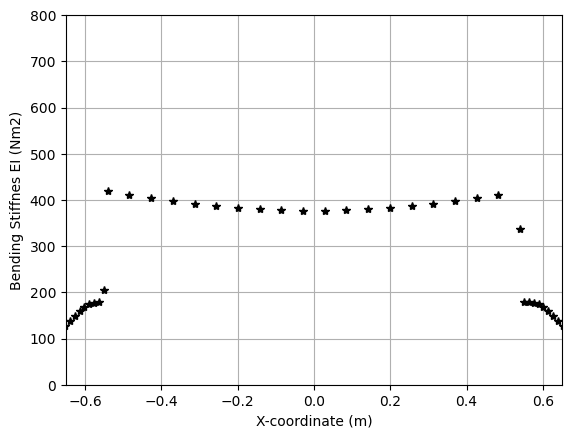

[[0.04039456]
 [0.04039456]
 [0.07928244]
 [0.11521315]
 [0.1468465 ]
 [0.1730026 ]
 [0.19270585]
 [0.20522132]
 [0.21008222]
 [0.20710722]
 [0.20096205]
 [0.19556861]
 [0.19077349]
 [0.18657702]
 [0.18297951]
 [0.17998119]
 [0.17758229]
 [0.17578296]
 [0.17458334]
 [0.17398351]
 [0.17398351]
 [0.17458334]
 [0.17578296]
 [0.17758229]
 [0.17998119]
 [0.18297951]
 [0.18657702]
 [0.19077349]
 [0.19556861]
 [0.20096205]
 [0.20710722]
 [0.21008222]
 [0.20522132]
 [0.19270585]
 [0.1730026 ]
 [0.1468465 ]
 [0.11521315]
 [0.07928244]
 [0.04039456]
 [0.04039456]]
6.498048777476181


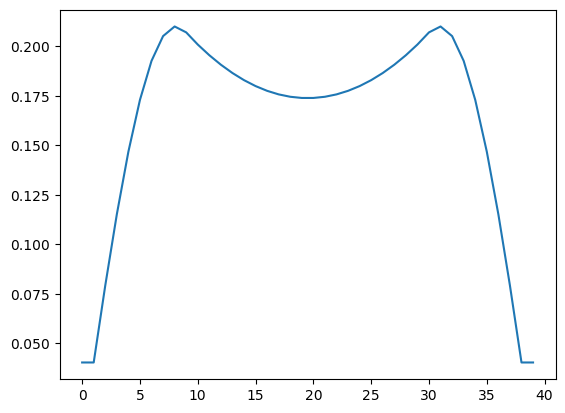

In [15]:
# Array for the SKi K2 ChK 204 Dimenssions
YL=PtXcoo          # Coordinate along the length
tL=+np.abs((PtZcoou-PtZcoo))#1e-3*np.array([66,67,73,113,158,172,151,114,71,65,65,65])               # Total Thickness along X direction
phi=0.40
delta=0.05
#tLh = ((tbody - th) / 2) * np.tanh(delta / th * (Xht + phi * Lc)) + (tbody + th) / 2
#tLs = -((tbody - ts) / 2) * np.tanh(delta / ts * (Xst + phi * Lc)) + (tbody + ts) / 2


b=PtYcoob            # Coordinate along the width
kL=PtZcoo              # kyepoints along the z direction
num_elements = len(YL)     # Number of elements
b[0]=b[1]
b[-1]=b[-2]
# Material properties
#ABS
E_abs=1.7e9
G_abs=0.6e9
nu_abs=0.49
Roh_Abs=1050
h_abs=4e-3
h_left=3.89e-3
#steel
h_steel=2e-3
E_steel=200e9          # Young's modulus in Pa of steel
G_steel=80e9          # Shear modulus in Pa
nu_steel=0.3
Roh_steel=7900
# CFRP
E_Grfp = 40.00e9         # Young's modulus in Pa
E2_Grfp = 40.00e9        # Young's modulus in Pa (perpendicular to fibers)
nu_Grfp = 0.283         # Poisson's ratio
G_Grfp = 6.7e9         # Shear modulus in Pa
Roh_Grfp=1660
h_Grfp=1e-3
# Wood
E_wood = 14e9            # Young's modulus in Pa for wood
G_wood = 5.5e9 
nu_wood = 0.3           # Poisson's ratio for wood
Roh_wood=500
h_wood=4e-3

HPlyh=np.array([-(h_wood/3+h_Grfp/3),-(h_wood/3+2*h_Grfp/3),-(h_wood/3+h_Grfp/3),-h_wood/3,0,h_wood/2,(h_wood/3+h_Grfp/3),(h_wood/3+2*h_Grfp/3),(h_wood/3+h_Grfp/2)])
HPlyc=np.array([-(h_wood/2+h_Grfp/2),-(h_wood/2+2*h_Grfp/3),-(h_wood/2+h_Grfp/3),-h_wood/2,0,h_wood/2,(h_wood/2+h_Grfp/3),(h_wood/2+2*h_Grfp/3),(h_wood/2+h_Grfp/2)])
HPlys=np.array([-(h_wood/3+h_Grfp/3),-(h_wood/3+2*h_Grfp/3),-(h_wood/3+h_Grfp/3),-h_wood/3,0,h_wood/2,(h_wood/3+h_Grfp/3),(h_wood/3+2*h_Grfp/3),(h_wood/3+h_Grfp/2)])
HPly = np.empty((len(HPlyc),len(b)))
HPly[:, :9] = HPlyh.reshape(-1, 1)  # Fill first 4 columns with vector H
HPly[:, 9:29] = HPlyc.reshape(-1, 1)  # Fill columns 4 to 6 with vector g
HPly[:, 29:] = HPlys.reshape(-1, 1)


#HPly=np.array([.5,1.5,1,2.0,2.0,1.0,1.5,.5])*1e-3   # Thickness of composite layers 
TotalThickness=np.sum(HPly)
thickness =TotalThickness#5e-3#np.sum(np.abs((PtZcoou-PtZcoo)))
#print(thickness)


b4=4e-3  #
b2=thickness-b4

b1=b-2*b4
h1=TotalThickness     # The Laminate total thickness  
h2=b4                 # The Abs total thickness  
h4=b4                 # The Steel total thickness  
r1=tL                 # The distance btw the global centroid and the portion center
r4=h4                 # The distance btw the global centroid and the Steel portion center
r2=r4+h2/2            # The distance btw the global centroid and the Abs portion center
# PolplaWood
E_Pwood = 8.5e9        # Young's modulus in Pa for Binder
nu_Pwood= 0.3          # Poisson's ratio for Binder
G_Pwood = 0.610e9 


E_Materail=np.array([E_Grfp,E_Grfp,E_Grfp,E_wood,E_wood,E_Grfp,E_Grfp,E_Grfp])
G_Materail=np.array([G_Grfp,G_Grfp,G_Grfp,G_wood,G_wood,G_Grfp,G_Grfp,G_Grfp])
nu_Materail=np.array([nu_Grfp,nu_Grfp,nu_Grfp,nu_wood,nu_wood,nu_Grfp,nu_Grfp,nu_Grfp])

length=np.max(np.abs(PtXcoo))*2 
el = float(length /num_elements)
print(length)
print(el)
print(num_elements)
P=1

k=30               # The curvatuve of the neutral longitudinal (d2w/dx2)
    
angles=np.array([0,45,0,0,0,0,-45,0])  # Angle of each CFRP layer in degrees

def calculate_ABD_matrices(E_mat, nu_mat,G_mat, h_mat,angles):
    
    # Initialize matrices A, B, and D
    A = np.zeros((3, 3))
    B = np.zeros((3, 3))
    D = np.zeros((3, 3))
    
      
    # Calculate A matrix elements for wood
    
    for i in np.arange(len(angles)):    

        if i==3 or i==4:
            Q_mat = np.array([[E_mat[i]/(1 - nu_mat[i]**2), nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [0, 0, G_mat[i]]]) 
            
        else:
            Q_mat = np.array([[E_mat[i]/(1 - nu_mat[i]**2), nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [0, 0, G_mat[i]]]) 
            angle = np.radians(angles[i])
            cos = np.cos(angle)
            sin = np.sin(angle)
            cs = cos*sin
            cc = cos**2
            ss = sin**2
            T = np.zeros((3, 3))
            T = np.array([[cc,    ss,   cs   ],
                          [ss,    cc,  -cs   ],
                          [-2*cs, 2*cs, cc-ss]])
            Q_mat = np.matmul(np.matmul(np.transpose(T), Q_mat), T)
            
        
        A[0, 0] += (Q_mat[0, 0]* (h_mat[i+1]-h_mat[i])) 
        A[1, 1] += (Q_mat[1, 1]* (h_mat[i+1]-h_mat[i])) 
        A[0, 1] += (Q_mat[0, 1]* (h_mat[i+1]-h_mat[i])) 
        A[1, 0] += (Q_mat[1, 0]* (h_mat[i+1]-h_mat[i]))
        A[2, 2] += (Q_mat[2, 2]* (h_mat[i+1]-h_mat[i])) 
    
    # Calculate D matrix elements for wood
        D[0, 0] += Q_mat[0, 0]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[1, 1] += Q_mat[1, 1]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[0, 1] += Q_mat[0, 1]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[1, 0] += Q_mat[1, 0]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[2, 2] += Q_mat[2, 2]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
    
    # Calculate B matrix elements (assuming symmetric laminate)
        B[0, 0] += 0.5*(Q_mat[0, 0]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[1, 1] += 0.5*(Q_mat[1, 1]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[0, 1] += 0.5*(Q_mat[0, 1]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[1, 0] += 0.5*(Q_mat[1, 0]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[2, 2] += 0.5*(Q_mat[2, 2]* (h_mat[i+1]**2-h_mat[i]**2))
        #i+=1
        
        
 
    # Calculate the compliance matrix
    A_B = np.block([[A, B], [B, D]])
    inverse_Stifness_matrix = np.linalg.inv(A_B)
    
    return A, B, D, inverse_Stifness_matrix


# Function to calculate the bending stiffness of a composite laminate
def calculate_bending_stiffness(inSM1,E_steel,E_abs, b1,b2,b4, r1,r2,r4,t4,t2):
    
    beta1=inSM1[0:3,3:6]
    delta1=inSM1[3:6,3:6]
    alfa1=inSM1[0:3,0:3]
   
    #beta2=inSM2[0:3,3:6]
    #alfa2=inSM2[0:3,0:3]
    #delta2=inSM2[3:6,3:6]
    

    EI1=b1*(2*beta1[2,2]*r1-delta1[2,2]*r1**2-alfa1[2,2])/(beta1[2,2]**2-delta1[2,2]*alfa1[2,2])
    #EI2=(2/alfa2[2,2])*(b2**3/12+(r2**2*b2))
    EI2=2*E_abs*b2*t2*(t2**2/12+r2**2)
    EI3=2*E_steel*b4*t4*(t4**2/12+r4**2)

    #Centroide of the section
    G1=(b1*beta1[2,2]-r1*delta1[2,2]*alfa1[2,2])/(beta1[2,2]**2-delta1[2,2]*alfa1[2,2])
    #G4=(r2*b2/alfa2[2,2])
    G4=(r4*b4*E_abs*t4)
    G2=(r4*b4*E_steel*t4)

    G3=(-b1*alfa1[2,2])/(beta1[2,2]**2-delta1[2,2]*alfa1[2,2])
    #G5=(b2/alfa2[2,2])
    G5=(b2*E_abs*t2)
    G6=(b4*E_steel*t4)

    RC=(G1+2*G2+2*G4)/(G3+2*G5+2*G6)
    EI= EI1+EI2+EI3

    return EI,RC
h=2e-3
zjGrfp=np.abs((h_wood+h_Grfp/2)-0.00406858)
zjabs=np.abs(h_abs-0.00406858)
zjwood=np.abs(h_wood-0.00406858)
zjSteel=np.abs(h_steel-0.00406858)
print(zjwood)
print(h_steel)
xjSteel=np.abs(b/2-b4)
xjabs=np.abs(b/2-b4)
def mass_fun(Roh_wood,Roh_steel,Roh_abs,Roh_GRP, b,h_steel,h_wood,h_Grfp,h_abs,el,zjGrfp,zjabs,zjwood,zjSteel,xjSteel,xjabs):
    count=0
    Mass = np.zeros((len(b), 1))
    IPT=np.zeros((len(b), 1))
    
    for i in b:
        
        Mass[count]=(2*(h_steel*b[count]*Roh_steel)+h_wood*b[count]*Roh_wood+h_Grfp*b[count]*Roh_Grfp+2*(h_abs*b[count]*Roh_abs))*el  ## Mass
        
        TPhorGrfp =Roh_Grfp*((1/12)*b[count]**3*h_Grfp+(1/3)*b[count]*(3*zjGrfp**2*h_Grfp+1/4*h_Grfp**3))## Polar mass moment of inertia Grfp
        TPhorwood =Roh_wood*((1/12)*b[count]**3*h_wood+(1/3)*b[count]*(3*zjwood**2*h_wood+1/4*h_wood**3))## Polar mass moment of inertia Grfp
        IPhor=TPhorwood+TPhorGrfp
        
        TPhorSteel =Roh_steel*(xjSteel[count]**2*b[count]*h_steel+(zjSteel**2*h_steel*b[count])+(1/12*h_steel**3*b[count])+1/12*h_steel*b[count]**3) ## Polar mass moment of inertia steel
        TPhorabs =Roh_abs*(xjabs[count]**2*b[count]*h_abs+(zjabs**2*h_abs*b[count])+(1/12*h_abs**3*b[count])+1/12*h_abs*b[count]**3) ## Polar mass moment of inertia abs
        IPver=2*TPhorSteel+2*TPhorabs
        IPT[count]=IPhor+IPver
        count=count+1
        

    return Mass,IPT

Mass,IPT=mass_fun(Roh_wood,Roh_steel,Roh_Abs,Roh_Grfp, b,h_steel,h_wood,h_Grfp,h_abs,el,zjGrfp,zjabs,zjwood,zjSteel,xjSteel,xjabs)

element_length = np.ones(num_elements) * (length / num_elements)


BendingStiff = np.zeros((len(b), 1))
Rcenter = np.zeros((len(b), 1))
j=0
for itr in b:
    #print(HPly[:, j])
        
    A1, B1, D1, inverseM1 = calculate_ABD_matrices(E_Materail, nu_Materail,G_Materail, HPly[:, j],angles)
    EI,RC = calculate_bending_stiffness(inverseM1,E_steel,E_abs, b1[j],b2,b4, r1[j],r2,r4,h4,h2) 
    
    BendingStiff[j]= EI 
    #print(BendingStiff)
    Rcenter[j]=RC
    j=j+1
    
    
plt.figure(2)
plt.plot(YL,BendingStiff,'k*')
plt.xlabel('X-coordinate (m)')
plt.ylabel('Bending Stiffnes EI (Nm2)')
plt.xlim(-0.650,0.650)
plt.ylim(0.0,800)
plt.grid()
plt.show()
print(Mass)
print(np.sum(Mass))
#print(IPT)
#print(BendingStiff)

#print(np.max(BendingStiff[10:-10]))
plt.plot(Mass)


Element Nodes: [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17, 18], [19, 20], [21, 22], [23, 24], [25, 26], [27, 28], [29, 30], [31, 32], [33, 34], [35, 36], [37, 38], [39, 40], [41, 42], [43, 44], [45, 46], [47, 48], [49, 50], [51, 52], [53, 54], [55, 56], [57, 58], [59, 60], [61, 62], [63, 64], [65, 66], [67, 68], [69, 70], [71, 72], [73, 74], [75, 76]]
Static Deflection simply-supported
[ 10.87093216  39.6733846   62.15077695 114.3378732  166.50164165
 208.56463585 315.34451148 338.69598065 494.4173599 ]


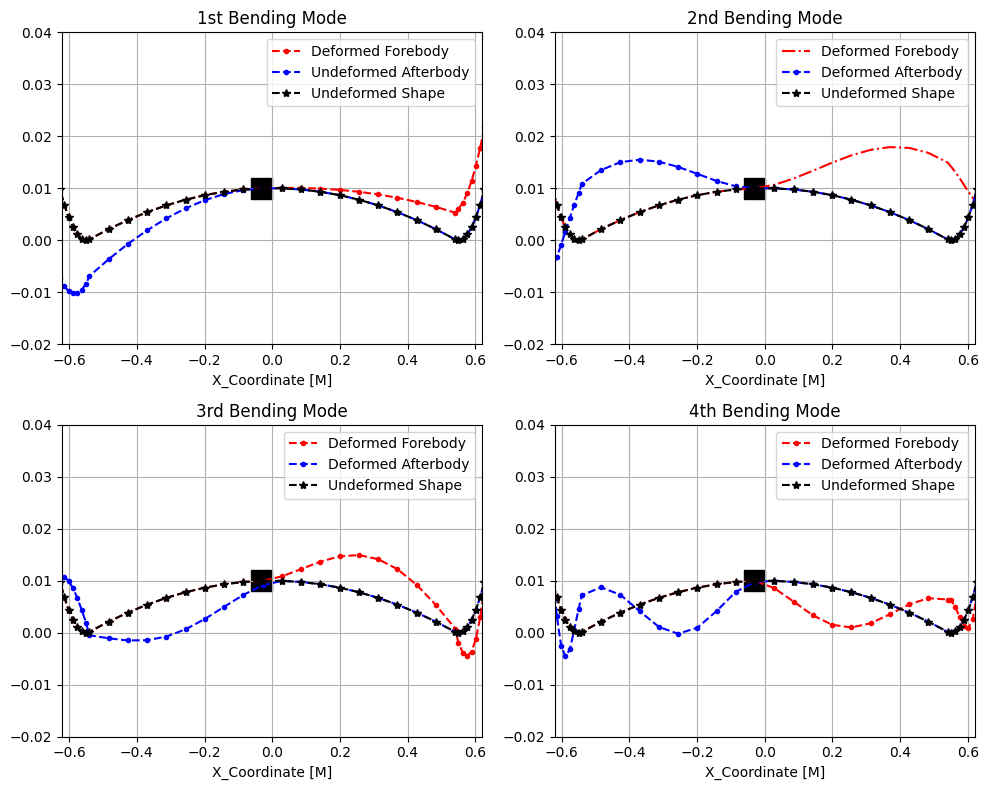

In [14]:
from scipy.linalg import eigh
import math
#print(b)
Analysis ='modalAnalysis'               # Static            set analysis type
                                                 # Modal analysis
                                                 # Contact
num_elements=len(YL)-2
BcModal=int(len(YL)-2)/2
n=2  # degree of freedom by node
num_dofs = n * (num_elements + 1)  # Total Number of degrees of freedom
element_nodes = []
el=len(YL)/num_elements
# Generate element nodes using a for loop
for i in range(num_elements):
    # Assuming each element has two nodes with two degrees of freedom per node
    node1 = 2*i + 1
    node2 = 2*i + 2
    element_nodes.append([node1, node2])
print("Element Nodes:", element_nodes)    
def elemen_stiffness_matrix(EI, el,P):
    KE = (EI/el)*np.array([[12,6*el,-12,6*el],
                         [6*el,4*el*el,-6*el,2*el*el],
                         [-12,-6*el,12,-6*el],
                         [6*el,2*el*el,-6*el,4*el*el]])

   
    #print(ME)
    #Force=np.transpose(np.array([P*el/2,P*el*el/12, P*el/2,-P*el*el/12]))
    Force=np.transpose(np.array([P*el/2,P*el*el/12, P*el/2,-P*el*el/12]))
    return KE,Force

# Assemble global stiffness matrix
global_stiffness = np.zeros((num_dofs, num_dofs))
global_Force = np.zeros((num_dofs))
KE_iter = np.zeros((4, 4,num_elements+1))

for i in range(num_elements+1):   
        
        # Assemble element's position in global stiffness matrix
        x1 = YL[i]
        x2 = YL[i+1]
        z1 = kL[i]
        z2 = kL[i+1]

        # Length of this element
        length = np.sqrt((x2 - x1)**2 + (z2 - z1)**2)
        lx=(x2 - x1)/2
        mx=(z2 - z1)/2
        cosa=lx/length;
        sena=mx/length;
        T = np.array([
        [cosa, sena, 0, 0],
        [-sena, cosa, 0, 0],
        [0, 0, cosa, sena],
        [0, 0, -sena, cosa] ])

        # Rotate stiffness matrix to global coordinates
               
        KE_iter[:,:,i],FE=elemen_stiffness_matrix(1e3*BendingStiff[i], el,0)
        #ME_iter[:,:,i],ME,FE=elemen_stiffness_matrix(BendingStiff[i], el, 0)
        #KE_iter[:,:,i] = np.dot(np.dot(T.T, KE_iter[:,:,i]), T)
        #ME_iter[:,:,i] = np.dot(np.dot(T.T, ME_iter[:,:,i]), T)
        #print(KE_iter[:,:,i])
global_mass=np.eye((num_dofs))
itra=0
for itr in range(num_elements-1):
    global_mass[2*itra, 2*itra] =Mass[itra][0]
    global_mass[2*itra+1, 2*itra+1] =IPT[itra][0]
    #print(global_mass[itra])
    itra+=1
#print(global_Force)
for itr in range(0, 2*(num_elements + 1)-2, 2):
    global_stiffness[itr:itr+4, itr:itr+4] += KE_iter[:,:,i]
    #global_mass[itr:itr+4, itr:itr+4] += ME_iter[:,:,i]
    #print(global_stiffness)
    global_Force[itr:itr+4] += FE


if Analysis == 'Static': # this is equal to your case 0
    print('Static Deflection simply-supported')
    def solve_displacements(global_stiffness, global_Force):
        displacements = np.linalg.solve(global_stiffness, global_Force)
        reactions = np.dot(global_stiffness, displacements)
        return displacements, reactions

    global_stiffness =np.delete(global_stiffness ,[2*8,2*8-1],0) #K[1:2,:]=[] 
    global_stiffness =np.delete(global_stiffness ,[2*8,2*8-1],1) #K[:,1:2]=[] 

    global_mass =np.delete(global_mass ,[2*8,2*8-1],0) #K[1:2,:]=[] 
    global_mass =np.delete(global_mass ,[2*8,2*8-1],1) #K[:,1:2]=[] 
 
    global_stiffness =np.delete(global_stiffness ,[2*32,2*32-1],0) #K[1:2,:]=[] 
    global_stiffness =np.delete(global_stiffness ,[2*32,2*32-1],1) #K[1:2,:]=[] 

    global_mass =np.delete(global_mass ,[2*32,2*32-1],0) #K[1:2,:]=[] 
    global_mass =np.delete(global_mass ,[2*32,2*32-1],1) #K[1:2,:]=[]

    global_Force=np.delete(global_Force,[2*8,2*8-1]) #f[1:2]=[]
    global_Force=np.delete(global_Force,[2*32,2*32-1]) #f[1:2]=[] 

    #global_Force[2*18-1]=-200
    global_Force[2*19-1]=-200
    #global_Force[2*20-1]=-200
    displacements,reactions=solve_displacements(global_stiffness, global_Force)
    Uz_Disp=np.hstack([0., displacements[1:2*num_elements-4:2], 0.])
    Ux_Disp=np.hstack([displacements[0:2*num_elements-3:2], displacements[2*num_elements-3]])
    print(np.max(np.abs(Uz_Disp)))
    plt.figure(1)
    plt.subplot(211)
    plt.plot(YL[1:-1],kL[1:-1],'k--*',label='Undeformed Shape')
    plt.plot(YL[1:-1],kL[1:-1]+Uz_Disp,label='Deformed Shape')
    plt.ylabel('displacements [m]')
    plt.xlabel('X_Coordinate [m]')
    plt.grid()
    plt.legend(loc='upper center')
    plt.xlim(-0.9,0.9)
    plt.ylim(-0.05,0.05)
    plt.show()
elif Analysis == 'modalAnalysis': 
    def modalAnalysis(global_mass,global_stiffness,BcModal):
        print('Static Deflection simply-supported')
        BcModal=int(BcModal)
        global_stiffness =np.delete(global_stiffness ,[2*BcModal,2*BcModal-1],0) #K[1:2,:]=[] 
        global_stiffness =np.delete(global_stiffness ,[2*BcModal,2*BcModal-1],0) #K[1:2,:]=[]
        global_stiffness =np.delete(global_stiffness ,[2*BcModal,2*BcModal-1],1) #K[1:2,:]=[] 
        global_stiffness =np.delete(global_stiffness ,[2*BcModal,2*BcModal-1],1) #K[1:2,:]=[] 

        global_mass =np.delete(global_mass ,[2*BcModal,2*BcModal-1],0) #K[1:2,:]=[] 
        global_mass =np.delete(global_mass ,[2*BcModal,2*BcModal-1],1) #K[1:2,:]=[]
        global_mass =np.delete(global_mass ,[2*BcModal,2*BcModal-1],0) #K[1:2,:]=[] 
        global_mass =np.delete(global_mass ,[2*BcModal,2*BcModal-1],1) #K[1:2,:]=[]
        evals, evecs = eigh(global_stiffness,global_mass)
        #print(evals)
        frequencies = np.sqrt(evals)
        evecs[1:]
        
        print(frequencies[1:10])
        return global_mass, global_stiffness, frequencies, evecs
    global_mass, global_stiffness, frequencies, evecs=modalAnalysis(global_mass,global_stiffness,BcModal)
        # Create a figure and four subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

       # Plot data on each subplot
    ax1.plot(YL[1:-2],kL[1:-2]+0.02*evecs[0::2,0],'r--.',label='Deformed Forebody')
    ax1.plot(YL[1:-2],kL[1:-2]+0.015*evecs[0::2,1],'b--.',label='Undeformed Afterbody')
    ax1.plot(YL[1:-1],kL[1:-1],'k--*',label='Undeformed Shape')
    ax1.set_xlabel('X_Coordinate [M]')
    ax1.legend()
    ax1.grid()
    ax1.set_title('1st Bending Mode')
    ax2.plot(YL[1:-2],kL[1:-2]+0.02*evecs[0::2,2],'r-.',label='Deformed Forebody')
    ax2.plot(YL[1:-2],kL[1:-2]+0.015*evecs[0::2,3],'b--.',label='Deformed Afterbody')
    ax2.plot(YL[1:-1],kL[1:-1],'k--*',label='Undeformed Shape')
    ax2.set_xlabel('X_Coordinate [M]')
    ax2.legend()
    ax2.grid()
    ax2.set_title('2nd Bending Mode')
    ax3.plot(YL[1:-2],kL[1:-2]+0.01*evecs[0::2,4],'r--.',label='Deformed Forebody')
    ax3.plot(-YL[1:-2],kL[1:-2]-0.01*evecs[0::2,4],'b--.',label='Deformed Afterbody')
    ax3.plot(YL[1:-1],kL[1:-1],'k--*',label='Undeformed Shape')
    ax3.set_xlabel('X_Coordinate [M]')
    ax3.legend()
    ax3.grid()
    ax3.set_title('3rd Bending Mode')
    ax4.plot(YL[1:-2],kL[1:-2]+0.010*evecs[0::2,6],'r--.',label='Deformed Forebody')
    ax4.plot(YL[1:-2],kL[1:-2]+0.010*evecs[0::2,7],'b--.',label='Deformed Afterbody')
    ax4.plot(YL[1:-1],kL[1:-1],'k--*',label='Undeformed Shape')
    ax4.set_xlabel('X_Coordinate [M]')
    ax4.legend()
    ax4.grid()
    ax4.set_title('4th Bending Mode')
        
    for ax in [ax1, ax2, ax3, ax4]:
            #ax.axvspan(-0.01, 0.01,  color='gray', alpha=0.3)
        ax.axhspan(0.008, 0.012,xmin=0.45, xmax=0.50,  color='k')
        
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xlim(-0.62, 0.62)
        ax.set_ylim(-0.02, 0.04)

# Adjust layout to prevent overlapping labels
    plt.tight_layout()
else:
    NewYL = np.zeros(2 * len(PtZcoo[:-1]) )
    # Filling the array of zeros with the elements of the original vector
    NewYL [::2] = PtZcoo[:-1]
    c=NewYL 
    c=PtZcoo[:-1]
    global_stiffness=global_stiffness[::2,::2]
    #print(NewYL )
    
    U=1
    fc=100
    Ks1=20e6             #(thesis) brenane MODELING THE MECHANICAL CHARACTERISTICS (page 32 and 64)
    toux=15e3           #(thesis) brenane MODELING THE MECHANICAL CHARACTERISTICS
    #FctSnow=Ks*(dz/U)*b
    deletaF=fc
    def calculate_displacements(Fz, global_stiffness, Ks):
        return np.linalg.solve(global_stiffness+Ks , Fz)
   

    num_load_steps = 30
    Ks= np.zeros(( len(global_stiffness),len(global_stiffness)))
    Ks[8,8]=Ks1
    Ks[32,32]=Ks1
    
    Fz = np.zeros(( len(global_stiffness),num_load_steps))
    Fz[16:19,0] =-100
    Fz[21:24,0] =-100
    d = np.zeros(( len(global_stiffness),num_load_steps))
    #d[:,0]=PtZcoo[:-1]
    P = np.zeros(( len(global_stiffness),num_load_steps))
    Pload= np.zeros(( len(global_stiffness),num_load_steps))
    dz=np.zeros(( (len(global_stiffness)),num_load_steps))
    DeltZ=np.zeros(( (len(global_stiffness)),num_load_steps))
    for t in range(1,num_load_steps):
        dz[:,t] = calculate_displacements(Fz[:,t-1], global_stiffness, Ks)
        #plt.plot(dz,'k')
        dz[:,t]+=dz[:,t-1]
        #dz=dz+PtZcoo[:-1]
        Fz[16:19,t] = Fz[16:19,t-1]-10 
        Fz[21:24,t] = Fz[21:24,t-1]-10
        DeltZ[:,t]=(PtZcoo[:-1]+dz[:,t])
        
        for it in range(len(DeltZ[:,t])):
            if DeltZ[it,t]<0:
                DeltZ[it,t]==DeltZ[it,t]
                #print(it)
            else:
                DeltZ[it,t]==0
                
        #print(DeltZ[:,t])
        Pload[:,t] = ((np.abs(DeltZ[:,t])).T @ Ks)
        #print(dz)
        #print(Cn) 
        for i, (x, y) in enumerate(zip(dz[:,t], PtZcoo[:-1])):
            if np.abs(x) == y or np.abs(x)>y:
                Ks[i,i]=Ks1
                #print(i)
        plt.plot(YL[:-1],PtZcoo[:-1]+dz[:,t],'k')
    plt.plot(YL[:-1],PtZcoo[:-1],label='Undeformed Shape')  
    plt.plot(YL[:-1],np.zeros((len(YL[:-1]))),'r--',label='Snow level')
    plt.ylabel('displacements [m]')
    plt.xlabel('X_Coordinate [m]')
    plt.ylim(-.01,0.0100)
    plt.xlim(-.6,0.6)
    plt.legend()
    plt.grid()
    plt.figure(2)
    for t in range(1,num_load_steps):
        plt.plot(YL[:-1],Pload[:,t]/1e3,'k')
    plt.ylabel('Pressure [KPa]')
    plt.xlabel('X_Coordinate [m]')
    plt.xlim(-.6,0.6)
    plt.grid()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for t in range(1,num_load_steps):
        ax.plot(YL[7:-7], t*np.ones((len(YL[7:-7]))), PtZcoo[7:-7]+dz[6:-7,t-1],'k-')
        ax.set_xlim(-0.6, 0.6)
    #ax.set_ylim(-800e-3, 800e-3)
        ax.set_zlim(-.0025,0.01)
    ax.set_xlabel('X_Coordinate')
    ax.set_ylabel('Load Steps')
    ax.set_zlabel('Displacements [m]')
    #ax.view_init(elev=25, azim=50)
    fig=plt.figure(5)
    ax1 = fig.add_subplot(111, projection='3d')
    for t in range(1,num_load_steps):
        ax1.plot(YL[7:-7], t*np.ones((len(YL[7:-7]))), Pload[6:-7,t]/1e3,'k-')
        ax1.set_xlim(-0.65, 0.65)
    #ax.set_ylim(-800e-3, 800e-3)
        #ax1.set_zlim(-.0025,0.01)
    ax1.set_xlabel('X_Coordinate')
    ax1.set_ylabel('Load Steps')
    ax1.set_zlabel('Pressure [KPa]')
    #ax1.view_init(elev=25, azim=50)

    
      


#global_mass, global_stiffness, frequencies, evecs=modalAnalysis(global_mass,global_stiffness,BcModal)
#global_mass, global_stiffness, frequencies, evecs=modalAnalysis(global_mass,global_stiffness)
#Flex=-0.6/np.max(Uz_Disp)
#print(Flex)
#plt.plot(YL[1:-1],Ux_Disp,'*')